In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time


In [2]:
#Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str


In [3]:
#Define steps
def step_1(state: CrashState) -> CrashState:
    print("Step1 executed")
    return {"step1": "done", "input": state["input"]}
    
def step_2(state: CrashState) -> CrashState:
    print("Step2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(30) #Simulate long running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("Step3 executed")
    return {"done": True}



In [4]:
builder = StateGraph(CrashState)

# nodes
builder.add_node('step_1', step_1)
builder.add_node('step_2', step_2)
builder.add_node('step_3', step_3)

# edges
builder.add_edge(START, 'step_1')
builder.add_edge('step_1', 'step_2')
builder.add_edge('step_2', 'step_3')
builder.add_edge('step_3', END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

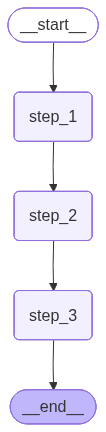

In [5]:
graph

In [ ]:
try:
    print(" Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable" : {"thread_id": "thread-1"}})
except KeyboardInterrupt:
    print(" Kernel manually interrupted (crash simulated)")

 Running graph: Please manually interrupt during Step 2...
Step1 executed
Step2 hanging... now manually interrupt from the notebook toolbar (STOP button)


In [1]:
graph.get_state({"configurable": {"thread_id": "thread-1"}})

NameError: name 'graph' is not defined

In [ ]:
list(graph.get_state_history({"configurable": {"thread_id": "thread-1"}}))

In [ ]:
#Re-run to show fault-tolerant resume
final_state = graph.invoke(None, config={"configurable": {"thread_id": "thread-1"}})
print("\n Final state:", final_state)

In [ ]:
list(graph.get_state_history({"configurable": {"thread_id": "thread-1"}}))

In [ ]:
##Above code works well in Jupeter Notebook